<a href="https://colab.research.google.com/github/altheaxcvii/project_2/blob/charles/train_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
import random

In [ ]:
data = pd.read_csv('train.csv')


In [ ]:
import os
print('Current Working Directory:', os.getcwd())
print('Files in the Directory:', os.listdir())

Current Working Directory: /etc/noteable/project
Files in the Directory: ['EDA.ipynb', 'draft2.ipynb', 'train.csv', 'train.csv.vectorized_content', 'train.csv.vectorized_metadata', '.git', '.gitignore', '.tmp', 'Definitions_Cleaning.ipynb', 'Definitions_Cleaning (1).ipynb', 'test.csv', 'sample_sub_reg.csv', 'sample_sub_reg.csv.vectorized_content', 'sample_sub_reg.csv.vectorized_metadata', 'test.csv.vectorized_metadata', 'test.csv.vectorized_content', 'Model_Training.ipynb']


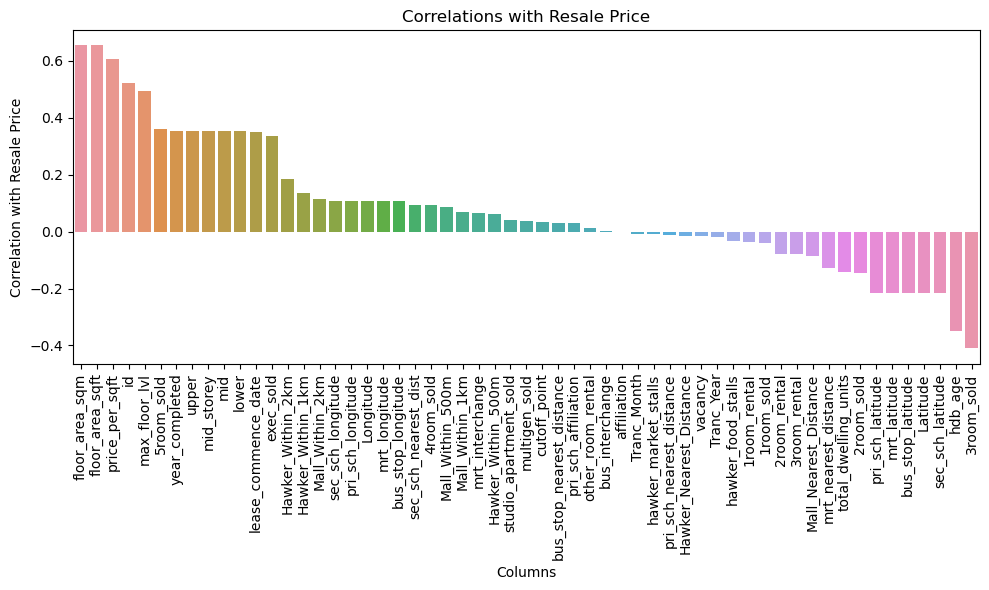

In [ ]:
# Compute correlations between each column and 'resale_price'
correlations = data.corr()['resale_price'].drop('resale_price')

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Correlation with Resale Price')
plt.title('Correlations with Resale Price')
plt.tight_layout()
plt.show()

In [ ]:
# Define the column categories
property_details_cols = ['Tranc_YearMonth', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'Tranc_Year', 'Tranc_Month', 'mid_storey', 'lower', 'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft', 'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed', 'residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units']

sold_rental_units_cols = ['1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental']

location_cols = ['postal', 'Latitude', 'Longitude', 'planning_area']

schools_cols = ['pri_sch_nearest_distance', 'pri_sch_name', 'vacancy', 'pri_sch_affiliation', 'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_nearest_dist', 'sec_sch_name', 'cutoff_point', 'affiliation', 'sec_sch_latitude', 'sec_sch_longitude']

mrt_and_bus_cols = ['mrt_nearest_distance', 'mrt_name', 'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude', 'bus_stop_nearest_distance', 'bus_stop_name', 'bus_stop_latitude', 'bus_stop_longitude']

facilities_cols = ['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls', 'hawker_market_stalls']


# Create a dictionary where keys are column categories and values are lists of column names
column_categories = {
    'Property Details': property_details_cols,
    'Sold and Rental Units': sold_rental_units_cols,
    'Location': location_cols,
    'Schools': schools_cols,
    'MRT and Bus': mrt_and_bus_cols,
    'Facilities': facilities_cols
}


In [ ]:
# Create a dictionary with column names as keys and data descriptions as values
data_descriptions = {
    'resale_price': "the property's sale price in Singapore dollars. This is the target variable that you're trying to predict for this challenge.",
    'Tranc_YearMonth': 'year and month of the resale transaction, e.g. 2015-02',
    'town': 'HDB township where the flat is located, e.g. BUKIT MERAH',
    'flat_type': 'type of the resale flat unit, e.g. 3 ROOM',
    'block': 'block number of the resale flat, e.g. 454',
    'street_name': 'street name where the resale flat resides, e.g. TAMPINES ST 42',
    'storey_range': 'floor level (range) of the resale flat unit, e.g. 07 TO 09',
    'floor_area_sqm': 'floor area of the resale flat unit in square metres',
    'price_per_sqft': 'Price per Square Foot of the unit',
    'flat_model': 'HDB model of the resale flat, e.g. Multi Generation',
    'lease_commence_date': "commencement year of the flat unit's 99-year lease",
    'Tranc_Year': 'year of resale transaction',
    'Tranc_Month': 'month of resale transaction',
    'mid_storey': 'median value of storey_range',
    'lower': 'lower value of storey_range',
    '2room_rental': '2 room rental flat',
    '3room_rental': '3 room rental flat',
    '4room_rental': '4 room rental flat',
    'postal':'postal code',
    'other_room_rental': 'other room rental flat',
    'upper': 'upper value of storey_range',
    'mid': 'middle value of storey_range',
    'full_flat_type': 'combination of flat_type and flat_model',
    'address': 'combination of block and street_name',
    'floor_area_sqft': 'floor area of the resale flat unit in square feet',
    'hdb_age': 'number of years from lease_commence_date to present year',
    'max_floor_lvl': 'highest floor of the resale flat',
    'year_completed': 'year which construction was completed for resale flat',
    'residential': 'boolean value if resale flat has residential units in the same block',
    'commercial': 'boolean value if resale flat has commercial units in the same block',
    'market_hawker': 'boolean value if resale flat has a market or hawker centre in the same block',
    'multistorey_carpark': 'boolean value if resale flat has a multistorey carpark in the same block',
    'precinct_pavilion': 'boolean value if resale flat has a pavilion in the same block',
    'total_dwelling_units': 'total number of residential dwelling units in the resale flat',
    'Latitude':'Latitude of the unit',
    'Longitude':'Longitude of the unit',
    'planning_area':'planning area of the unit',
    'pri_sch_nearest_distance':'distance of unit to the nearest primary school',
    '1room_sold': 'number of 1-room residential units in the resale flat',
    '2room_sold': 'number of 2-room residential units in the resale flat',
    '3room_sold': 'number of 3-room residential units in the resale flat',
    '4room_sold': 'number of 4-room residential units in the resale flat',
    '5room_sold': 'number of 5-room residential units in the resale flat',
    'exec_sold': 'number of executive type residential units in the resale flat block',
    'pri_sch_name':'name of the nearest primary school',
    'vacancy':'vacancy of the unit',
    'pri_sch_affiliation':'affiliation of primary school',
    'pri_sch_latitude':'latitude of primary school',
    'pri_sch_longitude':'longitude of primary school',
    'sec_sch_nearest_dist':'distance to nearest secondary school',
    'sec_sch_name':'name of nearest secondary school',
    'cutoff_point':'PSLE cutoff point of nearest secondary school',
    'affiliation':'if there is affiliation for the nearest secondary school',
    'sec_sch_latitude':'latitude of secondary school',
    'sec_sch_longitude':'longitude of secondary school',
    'multigen_sold': 'number of multi-generational type residential units in the resale flat block',
    'mrt_nearest_distance':'distance to nearest mrt',
    'mrt_name':'name of nearest mrt',
    'bus_interchange':'if there is a bus interchange',
    'mrt_interchange':'if there is an mrt interchange',
    'mrt_latitude':'latitude of mrt',
    'mrt_longitude':'longitude of mrt',
    'bus_stop_nearest_distance':'distance to nearest bus stop',
    'bus_stop_name':'name of bus stop',
    'bus_stop_latitude':'latitude of bus stop',
    'bus_stop_longitude':'longitude of bus stop',
    'Mall_Nearest_Distance':'Distance to the nearest mall',
    'Mall_Within_500m':'How many malls within 500m of the unit',
    'Mall_Within_1km':'How many malls within 1km of the unit',
    'Mall_Within_2km':'How many malls within 2km of the unit',
    'Hawker_Nearest_Distance':'Distance to nearest Hawker Center',
    'Hawker_Within_500m':'How many Hawker Centers within 500m of the unit',
    'Hawker_Within_1km':'How many Hawker Centers within 1km of the unit',
    'Hawker_Within_2km':'How many Hawker Centers within 2km of the unit',
    'studio_apartment_sold': 'number of studio apartment type residential units in the resale flat block',
    '1room_rental':'number of 1-room rental residential units in the resale flat block', 
    'hawker_food_stalls':'number of stalls at nearest hawker centre',
    'hawker_market_stalls':'number of market stalls at nearest hawker centre',
    
}


# Create a dictionary that maps each column to its category and description
column_info = {}

for category, columns in column_categories.items():
    for column in columns:
        column_info[column] = {'Category': category, 'Description': data_descriptions[column]}

# Convert the dictionary to a dataframe
column_info_df = pd.DataFrame.from_dict(column_info, orient='index')
# Reset the index to make 'Column' a column instead of an index
column_info_df.reset_index(inplace=True)
# Rename the 'index' column to 'Column'
column_info_df.rename(columns={'index': 'Column'}, inplace=True)

# Print the dataframe
print(column_info_df)

                       Column               Category  \
0             Tranc_YearMonth       Property Details   
1                        town       Property Details   
2                   flat_type       Property Details   
3                       block       Property Details   
4                 street_name       Property Details   
5                storey_range       Property Details   
6              floor_area_sqm       Property Details   
7                  flat_model       Property Details   
8         lease_commence_date       Property Details   
9                  Tranc_Year       Property Details   
10                Tranc_Month       Property Details   
11                 mid_storey       Property Details   
12                      lower       Property Details   
13                      upper       Property Details   
14                        mid       Property Details   
15             full_flat_type       Property Details   
16                    address       Property Det

        Property Details  Sold and Rental Units       Location  \
0        Tranc_YearMonth             1room_sold         postal   
1                   town             2room_sold       Latitude   
2              flat_type             3room_sold      Longitude   
3                  block             4room_sold  planning_area   
4            street_name             5room_sold            NaN   
5           storey_range              exec_sold            NaN   
6         floor_area_sqm          multigen_sold            NaN   
7             flat_model  studio_apartment_sold            NaN   
8    lease_commence_date           1room_rental            NaN   
9             Tranc_Year           2room_rental            NaN   
10           Tranc_Month           3room_rental            NaN   
11            mid_storey      other_room_rental            NaN   
12                 lower                    NaN            NaN   
13                 upper                    NaN            NaN   
14        

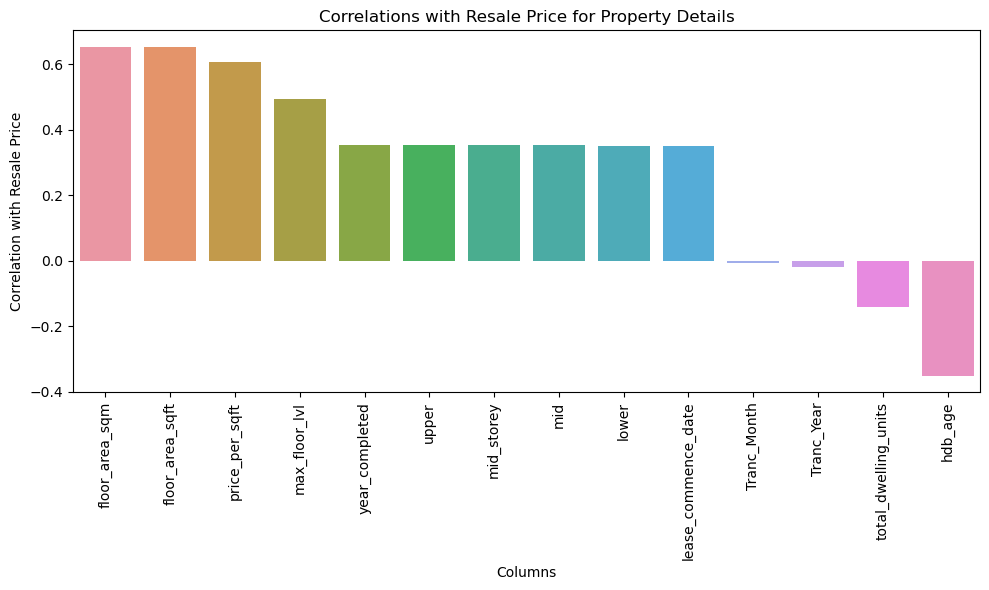

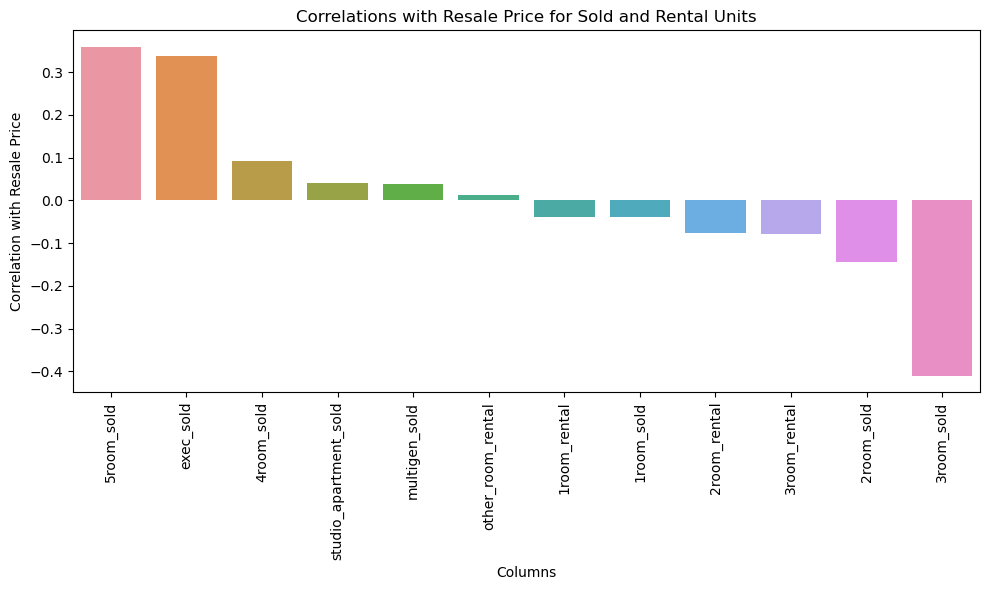

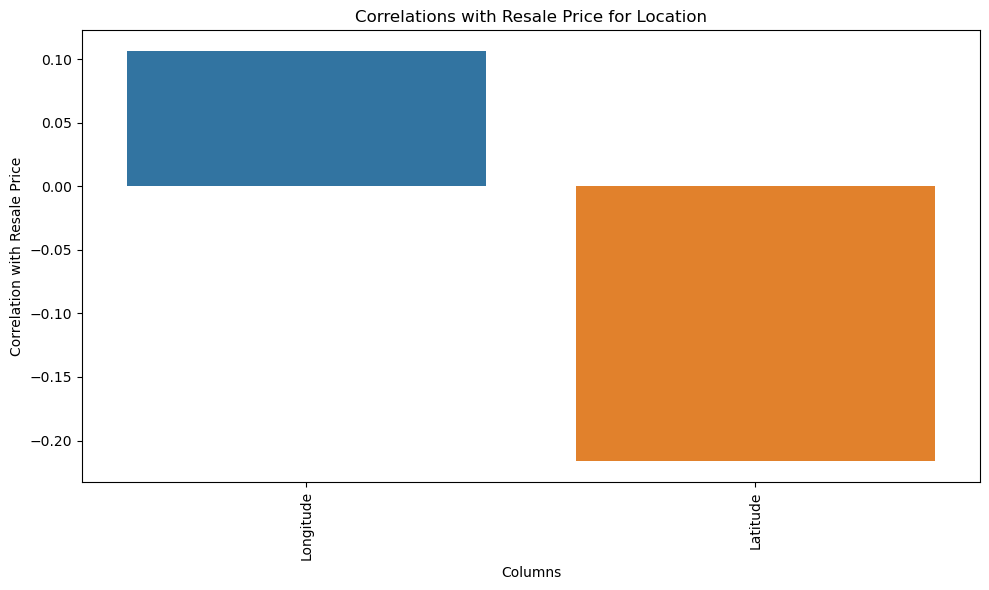

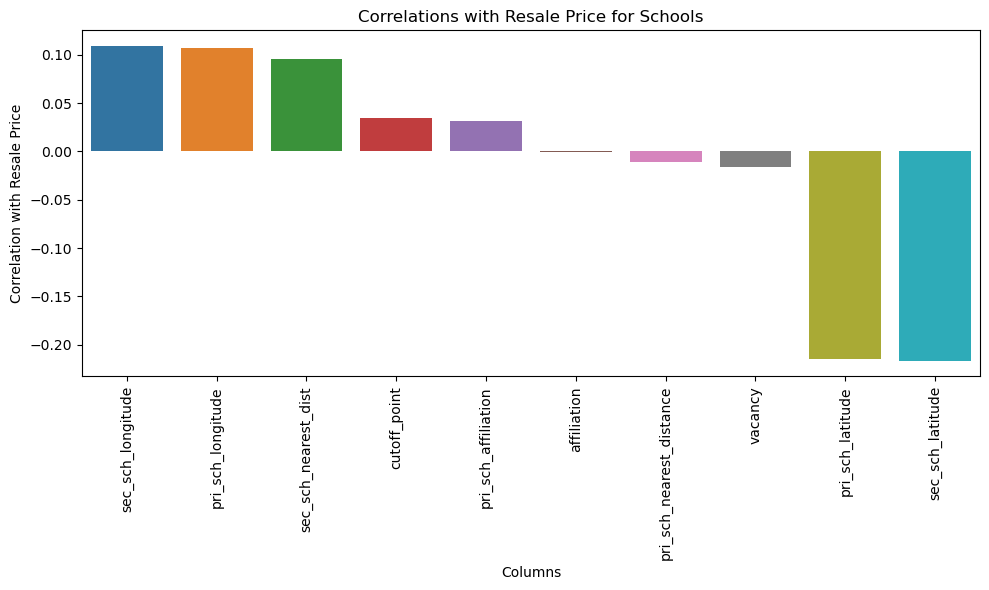

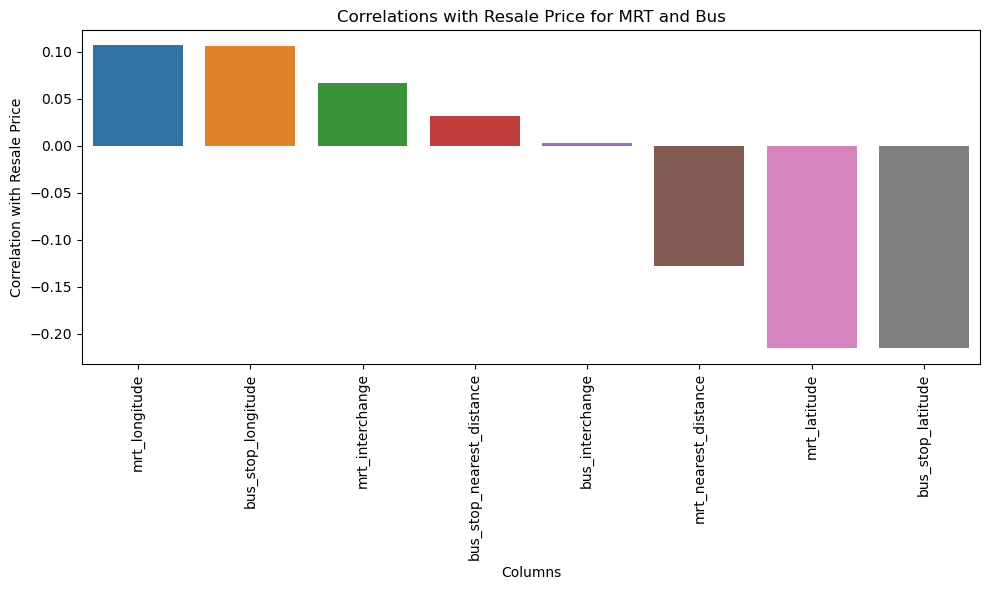

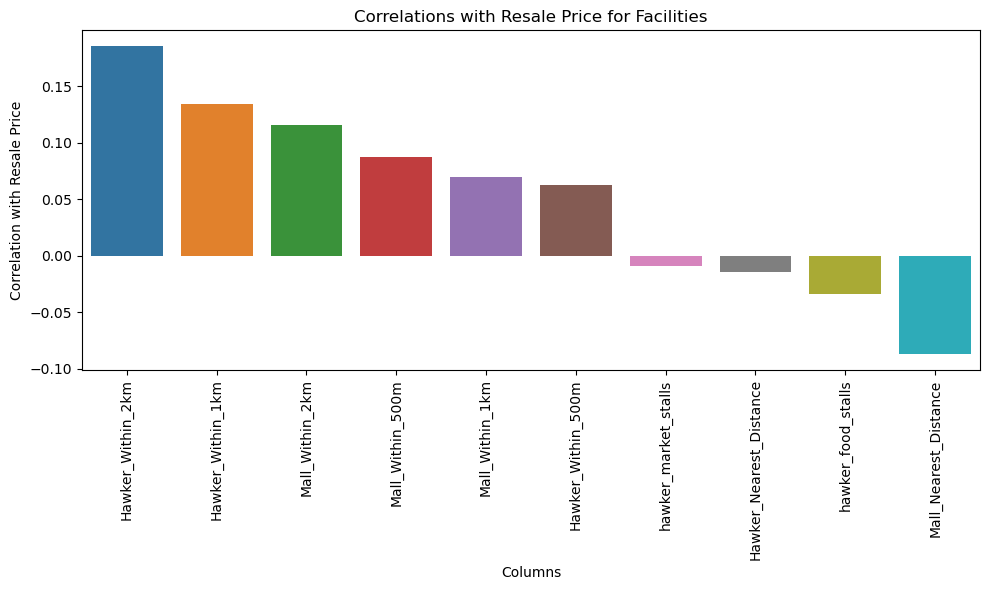

In [ ]:
# Create a dataframe from the dictionary
df_column_categories = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in column_categories.items() ]))

# Print the dataframe
print(df_column_categories)

# Add 'resale_price' to each category's list of columns
property_details_cols.append('resale_price')
sold_rental_units_cols.append('resale_price')
location_cols.append('resale_price')
schools_cols.append('resale_price')
mrt_and_bus_cols.append('resale_price')
facilities_cols.append('resale_price')

# Create dataframes for each category
property_details_df = data[property_details_cols]
sold_rental_units_df = data[sold_rental_units_cols]
location_df = data[location_cols]
schools_df = data[schools_cols]
mrt_and_bus_df = data[mrt_and_bus_cols]
facilities_df = data[facilities_cols]

# Define a function to compute correlations and plot the graph
def compute_correlations_and_plot(df, category_name):
    # Compute correlations
    correlations = df.corr()['resale_price'].drop('resale_price')

    # Sort the correlations
    sorted_correlations = correlations.sort_values(ascending=False)

    # Plot the correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values)
    plt.xticks(rotation=90)
    plt.xlabel('Columns')
    plt.ylabel('Correlation with Resale Price')
    plt.title(f'Correlations with Resale Price for {category_name}')
    plt.tight_layout()
    plt.show()

# Compute correlations and plot graphs for each category
compute_correlations_and_plot(property_details_df, 'Property Details')
compute_correlations_and_plot(sold_rental_units_df, 'Sold and Rental Units')
compute_correlations_and_plot(location_df, 'Location')
compute_correlations_and_plot(schools_df, 'Schools')
compute_correlations_and_plot(mrt_and_bus_df, 'MRT and Bus')
compute_correlations_and_plot(facilities_df, 'Facilities')